In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
plt.style.available   # Доступные стили

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [3]:
# Выбираем конкретный стиль
plt.style.use('ggplot')

In [4]:
a = np.random.normal(0, 1, 999)
b = np.random.normal(1, 2, 999)
c = np.random.normal(2, 3, 999)
df = pd.DataFrame([a, b, c]).T
df.columns = ['A', 'B', 'C']
df.head()

,A,B,C
0,1.615457,2.887239,0.551715
1,-0.082570,1.968772,3.791093
2,1.236965,-1.725820,4.981912
3,1.266790,-0.670602,5.652813
4,1.050897,0.730088,2.749315


In [5]:
def show_plot():
    '''Show plot'''
    ax.set_title('Example')
    ax.set_xlabel('X Axis')
    ax.set_ylabel('Y Axis')

    fig = ax.figure
    fig.set_size_inches(8, 3)
    fig.tight_layout(pad=1)
    plt.show()

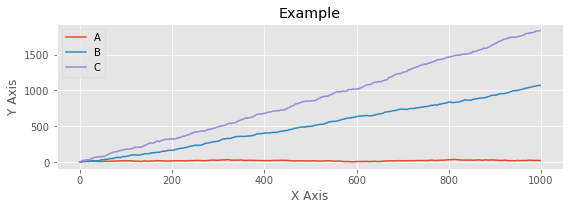

In [6]:
df1 = df.cumsum()
ax = df1.plot() # Создаем объект axes
show_plot()

In [7]:
df1.tail()

,A,B,C
994,24.075162,1067.307214,1827.814887
995,23.379823,1068.802060,1827.674453
996,25.382237,1071.010511,1826.712096
997,23.313106,1070.167529,1830.422086
998,24.529561,1067.653504,1835.681376


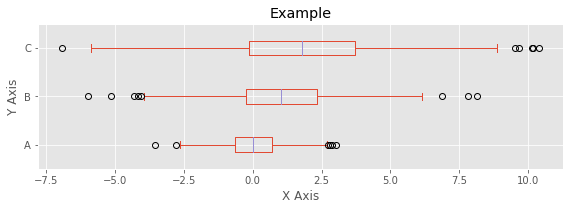

In [8]:
ax = df.plot.box(vert=False)
show_plot()

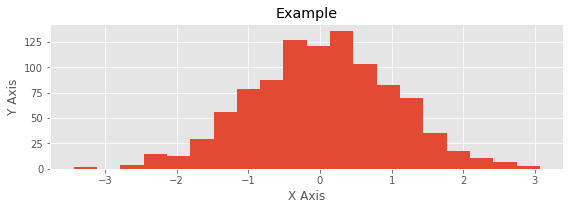

In [7]:
# Гистограмму
ax = df['A'].plot.hist(bins=20) # bins - количество прямоугольников
show_plot()

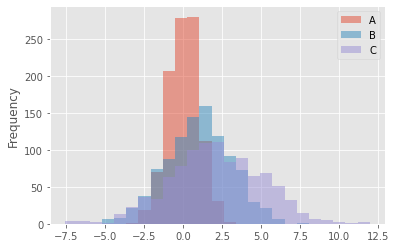

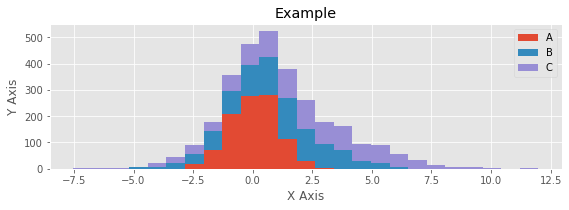

In [23]:
ax = df.plot.hist(bins=25, alpha=0.5) # alpha - параметр, отвечающий за прозрачность
ax = df.plot.hist(bins=25, stacked=True)
show_plot()

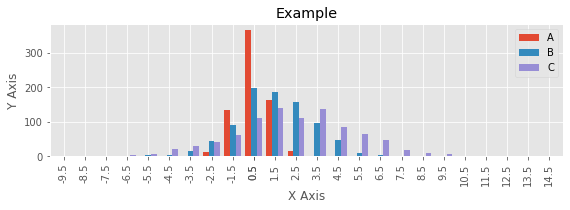

In [27]:
bins = np.linspace(-10, 15, 26)
binned = pd.DataFrame()
for x in df.columns:
    y = pd.cut(df[x], bins, labels=bins[:-1])
    y = y.value_counts().sort_index()
    binned = pd.concat([binned, y], axis=1)
binned.index = binned.index.astype('float')
binned.index += (np.diff(bins) / 2.0)
ax = binned.plot.bar(stacked=False, width=0.8)
show_plot()

In [29]:
binned

,A,B,C
-9.5,0,0,0
-8.5,0,0,0
-7.5,0,0,0
-6.5,0,0,3
-5.5,0,3,7
-4.5,0,3,21
-3.5,1,16,30
-2.5,14,45,41
-1.5,134,92,63
-0.5,306,142,96


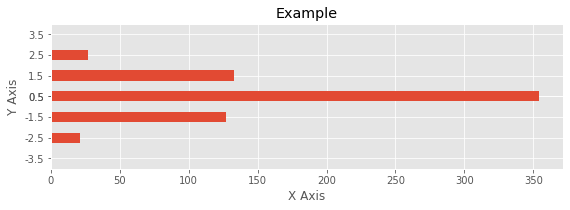

In [27]:
ax = binned['A'][(binned.index >= -4) & (binned.index <= 4)].plot.barh()
show_plot()

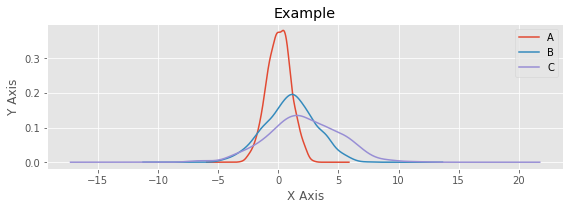

In [29]:
# Density plot
ax = df.plot.kde()
show_plot()

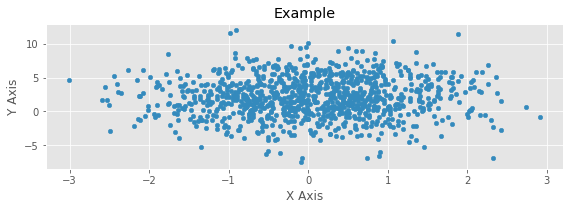

In [30]:
# Scatter plot
ax = df.plot.scatter(x='A', y='C')
show_plot()

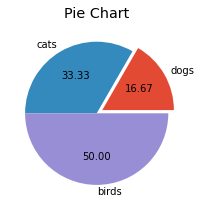

In [12]:
# Pie chart
s = pd.Series(data = [10, 20, 30], index = ['dogs', 'cats', 'birds'])
# explode выдвигает первый индекс, в данном случае dogs
ax = s.plot.pie(explode = [0.09, 0, 0], autopct='%.2f')

ax.set_title('Pie Chart')
ax.set_ylabel('')

fig = ax.figure
fig.set_size_inches(8, 3)
fig.tight_layout(pad=1)
plt.show()